<a href="https://colab.research.google.com/github/sage-artem/REU_course/blob/main/homework_3_week%5Breu_ml_school%5D_sageeeeee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**ML School by REU Data Scinece Club**</center>

---
## <center> Неделя №3 </center>




На этой неделе вам предстоит обработать данные о зарплатах. Данные очень похожи на настоящие, поэтому вам будет в каких-то моментах неприятно) В них очень много мусора и поэтому понадобиться потратить время на обработку. DS - специалист работает с чем-то подобным крайне часто.
Если столкнетесь с проблемой, пишите в чат, где вам помогут авторы и остальные участники, решать проблемы в коллективе - легче. Удачи!

Про данные можно прочитать [тут](https://oscarbaruffa.com/messy/)

Импортируем библиотеки которые могут вам понадобиться, а затем загрузим данные

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

Теперь давайте скачаем нужные данные


In [ ]:
!git clone https://github.com/MeinRespect/REU-Ml-SCHOOL.git

fatal: destination path 'REU-Ml-SCHOOL' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('/content/REU-Ml-SCHOOL/right_data.csv')
df.sample(5)

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
19788,4/29/2021 11:30:50,25-34,Computing or Tech,Online marketing manager,NaN,"39,000",NaN,EUR,NaN,NaN,Germany,NaN,Baden-Württemberg,2 - 4 years,2 - 4 years,Master's degree,Woman,Asian or Asian American
27833,6/15/2022 1:50:02,25-34,Nonprofits,Executive Assistant,NaN,56000,NaN,USD,NaN,NaN,USA,New Mexico,Santa Fe,11 - 20 years,5-7 years,College degree,Woman,"Hispanic, Latino, or Spanish origin"
17297,4/28/2021 19:58:05,35-44,Retail,Store Manager,Luxury,"93,000",1500.0,USD,NaN,NaN,USA,New York,New York city,21 - 30 years,11 - 20 years,College degree,Woman,White
574,4/27/2021 11:12:00,25-34,Media & Digital,Reporter,NaN,"36,000",0.0,USD,NaN,NaN,United States,Pennsylvania,Philadelphia,8 - 10 years,8 - 10 years,Master's degree,NaN,White
13111,4/28/2021 12:06:47,35-44,Nonprofits,Director of Training & Communication,NaN,"72,300",NaN,USD,NaN,NaN,United States,Pennsylvania,Philadelphia,11 - 20 years,2 - 4 years,Master's degree,Woman,White


Как можно заметить названия колонок оставляют желать лучшего, давайте это исправим

In [ ]:
df.columns = ['Timestamp', 'Age','Industry', 'Job', 'Job context', 'Salary',
              'Amount of monetary compensation', 'Currency',
              'Currency special', 'Income context', 'Country',
              'State in USA', 'City', 'Work experience all',
              'Work experience in current field', 'Education', 'Gender', 'Race'
              ]
df.sample(5, random_state=42)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Currency,Currency special,Income context,Country,State in USA,City,Work experience all,Work experience in current field,Education,Gender,Race
14401,4/28/2021 14:34:34,18-24,Health care,Development Operations Associate,NaN,"62,000",NaN,USD,NaN,NaN,USA,New York,New York,5-7 years,1 year or less,College degree,Woman,Asian or Asian American
26226,5/17/2021 17:26:02,45-54,Media & Digital,"Manager, Content Marketing",NaN,118450,5000.0,USD,NaN,NaN,USA,New Jersey,"NA (work from home in small town, decline to s...",21 - 30 years,11 - 20 years,College degree,Man,White
11624,4/28/2021 2:54:22,25-34,Science (Chemistry R&D),QMS Manager,ISO13485,"123,000",NaN,AUD/NZD,NaN,Not including 9% superannuation,Australia,NaN,Sydney,11 - 20 years,5-7 years,College degree,Woman,White
22345,4/30/2021 19:16:58,45-54,Education (Higher Education),Associate Clinical Professor,NaN,85000,15000.0,USD,NaN,NaN,USA,Pennsylvania,Philadelphia,31 - 40 years,11 - 20 years,PhD,Woman,White
2595,4/27/2021 11:47:56,25-34,"Marketing, Advertising & PR","Manager, Medical Writing",Manage one medical writer and work on medical ...,"105,000",11000.0,USD,NaN,NaN,USA,Pennsylvania,currently remote,8 - 10 years,8 - 10 years,Master's degree,Woman,White


In [ ]:
df.describe()

,Amount of monetary compensation
count,2.069000e+04
mean,1.821073e+04
std,8.355831e+05
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+03
75%,1.000000e+04
max,1.200000e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Timestamp                         27945 non-null  object 
 1   Age                               27945 non-null  object 
 2   Industry                          27873 non-null  object 
 3   Job                               27945 non-null  object 
 4   Job context                       7233 non-null   object 
 5   Salary                            27945 non-null  object 
 6   Amount of monetary compensation   20690 non-null  float64
 7   Currency                          27945 non-null  object 
 8   Currency special                  197 non-null    object 
 9   Income context                    3034 non-null   object 
 10  Country                           27945 non-null  object 
 11  State in USA                      22963 non-null  object 
 12  City

# **Задание 1. Чистка данных (6 баллов)**

## Этап 1.1
Теперь вам нужно привести колонки Salary и Amount of monetary compensation к единой шкале измерения - доллару.
Для этого вы можете использовать два способа:

1.   Простой. Вы берете сегодняшнюю дату и приводите все основные валюты из колонки Currency к доллару, а те строчки, где значение колонки равно "Other", вы удаляете.
2.   Сложный. Вы смотрите на значение Timestamp и актуальный для этой даты курс. Если в Currency встречается значение "Other", то вы пытаетесь восстановить валюту по колонке Currency Special. Тут вам может пригодится библиотека [forex](https://forex-python.readthedocs.io/en/latest/usage.html).

За оба решения вы получите **одинаковое количество баллов**, но учитывайте, что в простом вы теряете много полезной информации.

In [ ]:
# Ваш код тут
print(df['Salary'].isna().sum(), df['Amount of monetary compensation'].isna().sum())
print()
df['Currency special'][~df['Currency special'].isnull()].iloc[1:10] #решил посмотреть, что вообще в себе несет эта колонка Currency special

0 7255



603                                        Peso Argentino
752                                            $76,302.34
766     My bonus is based on performance up to 10% of ...
776     I work for an online state university, managin...
1001                                                    0
1311                                                  MYR
1840                                                  CHF
1915                                                  KWD
1924                                                  NOK
Name: Currency special, dtype: object

In [ ]:
df['Currency special'].value_counts()

USD                       11
INR                       10
NOK                       10
SGD                        9
MYR                        8
                          ..
55,000                     1
ILS/NIS                    1
Norwegian kroner (NOK)     1
Stock                      1
NGN                        1
Name: Currency special, Length: 114, dtype: int64

In [ ]:
df['Currency'].value_counts() # смотрим какие валюты присутствуют в датасете

USD        23287
CAD         1665
GBP         1585
EUR          637
AUD/NZD      500
Other        156
CHF           37
SEK           37
JPY           23
ZAR           14
HKD            4
Name: Currency, dtype: int64

1 CAD -> **0.72977** USD;

1 GBP -> **1.23** USD;

1 EUR -> **1.07** USD;

1 AUD/NZD  -> **0.6713** USD;

1 CHF -> **1.08** USD;

1 SEK -> **0.095024** USD;

1 JPY -> **0.007599** USD;

1 ZAR -> **0.053985** USD;

1 HKD -> **0.1276** USD;

In [ ]:
df['Salary'] = df['Salary'].apply(lambda x: int(x.replace(',','')))

In [ ]:
currency_dict = {
                'CAD': 0.72977,
                'GBP': 1.23,
                'EUR': 1.07,
                'AUD/NZD': 0.6713,
                'CHF': 1.08,
                'SEK': 0.095024,
                'JPY': 0.007599,
                'ZAR': 0.053985,
                'HKD': 0.1276,
                'USD': 1
                }
pd.options.mode.chained_assignment = None
for i in range(len(df)):
    try:
        if df['Currency'].loc[i] != 'Other':
            df['Salary'].loc[i] *= currency_dict[df['Currency'].loc[i]]
            df['Amount of monetary compensation'].loc[i] *= currency_dict[df['Currency'].loc[i]]
        else:
            df.drop(i, axis=0, inplace=True)
    except:
        print(i)


In [ ]:
df.head(10)


,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Currency,Currency special,Income context,Country,State in USA,City,Work experience all,Work experience in current field,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.0,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,67158.0,4920.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.0,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.0,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.0,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000.0,NaN,USD,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,33000.0,2000.0,USD,NaN,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000.0,NaN,USD,NaN,NaN,United States,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,112000.0,10000.0,USD,NaN,NaN,US,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000.0,0.0,USD,NaN,I work for a Charter School,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White"


In [ ]:
df.reset_index(inplace=True, drop=True) #из-за удаления строк надо было сбросить индексы

In [ ]:
df['Currency'].value_counts() #other Больше нет

USD        23287
CAD         1665
GBP         1585
EUR          637
AUD/NZD      500
CHF           37
SEK           37
JPY           23
ZAR           14
HKD            4
Name: Currency, dtype: int64

После стандартизации к доллару удалите эти две колонки: Currency и Currency Special


In [ ]:
# Ваш код тут
df.drop(['Currency', 'Currency special'], inplace=True, axis=1)

In [ ]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27789 entries, 0 to 27788
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Timestamp                         27789 non-null  object 
 1   Age                               27789 non-null  object 
 2   Industry                          27718 non-null  object 
 3   Job                               27789 non-null  object 
 4   Job context                       7188 non-null   object 
 5   Salary                            27789 non-null  float64
 6   Amount of monetary compensation   20583 non-null  float64
 7   Income context                    3011 non-null   object 
 8   Country                           27789 non-null  object 
 9   State in USA                      22950 non-null  object 
 10  City                              27714 non-null  object 
 11  Work experience all               27789 non-null  object 
 12  Work

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work experience in current field,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.0,0.0,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,67158.0,4920.0,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.0,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.0,3000.0,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.0,7000.0,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


## Этап 1.2
Приведите страны к единым названиям, например в данных не должно быть одновременно USA и United States. Различных значений много, но постарайтесь сохранить как можно больше информации. Строки с нерелевантными значениями удалите. В качестве помощи мы уже подготовили значения для замены некоторых стран. Обрабатывать все наблюдения необязательно, но постарайтесь восстановить как можно больше значений.                                   

In [ ]:
usa_names = ['United States', 'US', 'USA',
       'usa', 'U.S.', 'United States ', 'us',
       'Usa', 'United States of America', 'United states', 'USA ',
       'United states ','united states', 'United States of America ',
       'U.S. ', 'U.S>', 'ISA', 'US ', 'United State', 'U.S.A',
       'U.S.A.', 'America', 'united states of america', 'Us', 'The United States',
       'United State of America', 'United Stated','u.s.', 'UNITED STATES', 'united States',
       'USA-- Virgin Islands', 'U.S', 'Unites States ', 'Usa ', 'U.S.A. ',
       'U. S. ', 'United Sates', 'United States of American ''Uniited States',
       'Worldwide (based in US but short term trips aroudn the world)',
       'United Sates of America', 'United States', 'america', 'Unted States', 'United Statesp',
       'United Stattes', 'United Statea', 'Unites States', 'United Statees',
       'UNited States', 'Uniyed states', 'Uniyes States', 'United States of Americas',
       'U.A.', 'U. S.' 'US of A', 'United States of america ',
       'U.SA', 'United Status', ' U.S.', 'Serbia', 'Canada and USA',
       'Virginia', 'U.s.', 'U.s.a.', 'USS', 'Uniteed States', 'United Stares',
       ' US', 'Unites states ', 'Us ', 'Unite States', 'The US',
       'united states ', 'United States (I work from home and my clients are all over the US/Canada/PR',
       'United states of America ', 'For the United States government, but posted overseas',
       'From Romania, but for an US based company', 'UnitedStates', 'Uniited States',
       'United States of america', 'United statew', ' United States', 'United Statues',
       'Untied States', 'United States of American ', 'USA (company is based in a US territory, I work remote)',
       'USAB', 'Unitied States', 'United Sttes', 'united stated', 'United States Of America',
       'Uniter Statez', 'U. S ', 'United states of America',
       'USA tomorrow ', 'United Stateds', 'Japan, US Gov position',
       'n/a (remote from wherever I want)',  'US govt employee overseas, country withheld', 'usa ',
       'San Francisco', 'Usat', '🇺🇸 ', 'Unitef Stated', 'UA',
       'United Stares ', 'United STates', 'USaa', 'uSA',
       'United States- Puerto Rico','California ', 'US of A',
       'uS', 'USD', "USA, but for foreign gov't", 'U. S.', 'United y',
       'United Statss', 'United states of america', 'UsA',
       'I work for a UAE-based organization, though I am personally in the US.',
       'United  States',  'United States is America',
       'United States of American', 'U.S.A ', 'United Statws']

uk_names = ['United Kingdom', 'United Kingdom ', 'Scotland ',
           'United Kingdom', 'UK ', 'England/UK',
           'UK', 'Great Britain ', 'Englang',
           'Scotland', 'UK (England)',
           'England', 'UK', 'Wales (United Kingdom)', 'England ',
           'Ireland', 'United kingdom ', 'Uk', 'united kingdom',
           'Great Britain', 'UK for U.S. company',
           'England', 'U.K. (northern England)', 'U.K',
           'Ireland', 'Wales (UK)', 'ireland'
           'Northern Ireland',  'europe', 'United Kingdom (England)',
           'United Kingdom.', 'Northern Ireland ', 'england',
           'United kingdom', 'United Kingdomk', 'UK (Northern Ireland)',
           'England, Gb', 'UK, remote', 'ENGLAND', 'England, UK.',
           'England, United Kingdom', 'U.K.', 'Scotland, UK', 'Wales', 'United Kindom',
           'Wales, UK', 'Unites kingdom',  'U.K. ',
           'Wales, UK', 'England, UK',  'Uk ',  'uk',
           'Northern Ireland, United Kingdom', 'uk',
           'UK, but for globally fully remote company']

canada_names = ['canada', 'Canada ', 'Canada, Ottawa, ontario', 'CANADA ',
               'Canadw', 'CANADA', 'Can', 'Canda', 'Canad', 'Csnada', 'Canadá', 'Canada ', 'Canad', 'Csnada']

ger_names = ['Germany ', 'germany', 'Company in Germany. I work from Pakistan.']

In [ ]:
# Ваш код тут
countries = [usa_names, uk_names, canada_names, ger_names]

countries_names = ['USA', 'UK', 'Canada', 'Germany']

pd.options.mode.chained_assignment = None
for i in range(len(df)):
    flag = False
    index_country = 0
    for cntry in countries:
        if df['Country'].loc[i] in cntry:
            df['Country'].loc[i] = countries_names[index_country]
            flag = True
            break
        index_country += 1
    if not flag:
        df.drop(labels=i, axis=0, inplace=True)

In [ ]:
df.reset_index(inplace=True, drop=True) #из-за удаления строк надо было сбросить индексы

In [ ]:

df['Country'].value_counts()

USA        23105
UK          1688
Canada       116
Germany       23
Name: Country, dtype: int64

In [ ]:
df.sample(10)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work experience in current field,Education,Gender,Race
4020,4/27/2021 12:32:54,55-64,Sales,Senior Layout Specialist,page layout and design for print and digital t...,50003.00,2000.0,NaN,USA,North Carolina,Chapel Hill,21 - 30 years,21 - 30 years,College degree,Woman,White
8148,4/27/2021 16:57:43,25-34,Education (Higher Education),Lecturer,NaN,75000.00,NaN,NaN,USA,Wisconsin,Madison,2 - 4 years,2 - 4 years,PhD,Woman,White
21269,5/3/2021 17:05:34,25-34,Education (Primary/Secondary),High School Teacher,NaN,46429.00,5000.0,The extra is a local millage that must be rene...,USA,Florida,Bradenton,5-7 years,5-7 years,College degree,Woman,White
1853,4/27/2021 11:36:45,35-44,"Accounting, Banking & Finance",Financial Analyst,NaN,87500.00,0.0,NaN,USA,Texas,Irving,11 - 20 years,5-7 years,Master's degree,Man,"Hispanic, Latino, or Spanish origin"
19878,4/30/2021 18:44:33,25-34,Nonprofits,Director of Development,NaN,70000.00,NaN,NaN,USA,North Carolina,Winston Salem,8 - 10 years,5-7 years,College degree,Woman,White
14351,4/28/2021 17:31:06,25-34,Entertainment,Learning Artist,Theatre education department,29914.83,NaN,NaN,UK,NaN,Birmingham UK,5-7 years,5-7 years,College degree,Woman,White
15282,4/28/2021 19:27:01,25-34,Hospitality & Events,Event Manager,NaN,45000.00,NaN,NaN,USA,North Carolina,Durham,5-7 years,2 - 4 years,College degree,Woman,White
6064,4/27/2021 13:59:04,35-44,Biotech,Scientific Manager,NaN,128000.00,16000.0,NaN,USA,Massachusetts,Cambridge,11 - 20 years,11 - 20 years,Master's degree,Woman,White
9027,4/27/2021 19:30:51,55-64,Computing or Tech,Technical Project Manager,NaN,92000.00,NaN,NaN,USA,California,Oakland,31 - 40 years,31 - 40 years,College degree,Woman,"Asian or Asian American, Hispanic, Latino, or ..."
13388,4/28/2021 15:56:48,35-44,Property or Construction,Executive Assistant,NaN,95250.00,5000.0,NaN,USA,New York,New York City,11 - 20 years,11 - 20 years,Master's degree,Woman,White


# **Задание 2. Замена пропущенных значений (5 баллов)**



## Этап 2.1
Найдите в данных пропущенные значения и выведите их количество для каждой колонки:

In [ ]:
# Ваш код тут
df.isna().sum()

Timestamp                               0
Age                                     0
Industry                               63
Job                                     0
Job context                         18422
Salary                                  0
Amount of monetary compensation      6286
Income context                      22272
Country                                 0
State in USA                         2002
City                                   63
Work experience all                     0
Work experience in current field        0
Education                             175
Gender                               1065
Race                                  149
dtype: int64

Замените пропущенные значения во всех колонках **кроме Education**. Там где можно сделайте это с помощью моды, а в колонках по типу State in USA замените на определенное значение, в данном случае Another Country, а в Amount of monetary compensation на 0

In [ ]:
# Ваш код тут
df['State in USA'][df['State in USA'].isnull()] = 'Another Country'
df['Amount of monetary compensation'][df['Amount of monetary compensation'].isnull()] = 0


In [ ]:
print(df['Industry'].mode())
df['Industry'][df['Industry'].isnull()] = 'Computing or Tech'

0    Computing or Tech
Name: Industry, dtype: object


In [ ]:
print(df['Job context'].mode(), df['Job context'].value_counts(), sep='\n')
df['Job context'][df['Job context'].isnull()] = 'No information' #посчитал заменять Fundraising слишком опрометчиво

0    Fundraising
Name: Job context, dtype: object
Fundraising                                                             19
In commercial real estate industry                                      10
Public library                                                           7
Attorney                                                                 7
Librarian                                                                7
                                                                        ..
Copywriting, editing and digital content. I don't manage any people.     1
Biomedical sciences                                                      1
Database and statistic work                                              1
Aide in special education                                                1
Automotive mechanical engineering                                        1
Name: Job context, Length: 6272, dtype: int64


In [ ]:
print(df['Income context'][~df['Income context'].isnull()][:10])
df['Income context'][df['Income context'].isnull()] = 'No information'

9                            I work for a Charter School
30                                      Commission based
42                         Around 20,000 a year in stock
56                       Extra money comes from overtime
58     Technically 37.5 hours, but ends up being pret...
79     Bonuses are variable based on company's perfor...
98                     Doesn't include tuition remission
100    I am, like most professors, a "9 month" employ...
124    Bonus average was used; it varied depending on...
134                                     tax-free stipend
Name: Income context, dtype: object


In [ ]:
print(df['City'].mode(), df['City'].value_counts())
df['City'][df['City'].isnull()] = 'Boston'

0    Boston
Name: City, dtype: object Boston             771
Chicago            749
New York           709
Seattle            690
London             554
                  ... 
Virtual              1
Wailuku              1
RICHMOND             1
St. Croix Falls      1
Spotsylvania         1
Name: City, Length: 4123, dtype: int64


In [ ]:
print(df['Gender'].mode(), df['Gender'].value_counts())
df['Gender'][df['Gender'].isnull()] = 'Woman'

0    Woman
Name: Gender, dtype: object Woman    19165
Man       4702
Name: Gender, dtype: int64


In [ ]:
print(df['Race'].mode(), df['Race'].value_counts())
df['Race'][df['Race'].isnull()] = 'White'

0    White
Name: Race, dtype: object White                                                                                                                            20783
Asian or Asian American                                                                                                           1139
Black or African American                                                                                                          617
Hispanic, Latino, or Spanish origin                                                                                                532
Another option not listed here or prefer not to answer                                                                             503
Hispanic, Latino, or Spanish origin, White                                                                                         362
Asian or Asian American, White                                                                                                     312
Black or African A

In [ ]:
df.isna().sum()

Timestamp                             0
Age                                   0
Industry                              0
Job                                   0
Job context                           0
Salary                                0
Amount of monetary compensation       0
Income context                        0
Country                               0
State in USA                          0
City                                  0
Work experience all                   0
Work experience in current field      0
Education                           175
Gender                                0
Race                                  0
dtype: int64

In [ ]:
df.sample(10)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work experience in current field,Education,Gender,Race
846,4/27/2021 11:17:07,25-34,Law,Paralegal,No information,43500.0,200.0,No information,USA,Missouri,Springfield,8 - 10 years,5-7 years,College degree,Woman,White
10560,4/28/2021 6:08:36,35-44,Engineering or Manufacturing,Senior consultant,Railway safety and compliance consultancy,67650.0,4735.5,Salary and pension - other benefits are not mo...,UK,Another Country,Derby,11 - 20 years,11 - 20 years,Master's degree,Man,White
3493,4/27/2021 12:17:11,55-64,"Accounting, Banking & Finance",Vice President Credit Card Operations,No information,132000.0,10000.0,No information,USA,Delaware,Wilmington,21 - 30 years,11 - 20 years,Master's degree,Woman,White
13989,4/28/2021 17:14:50,35-44,"Marketing, Advertising & PR",Multimedia Content Coordinator,Social media coordinator and marketing writer ...,36316.0,3684.0,No information,USA,Washington,Spokane,8 - 10 years,5-7 years,College degree,Woman,White
22842,5/6/2021 23:27:38,35-44,"Accounting, Banking & Finance",Director of Experience & Strategy,Experience design and corporate strategy for a...,136000.0,40000.0,No information,USA,Massachusetts,Boston,11 - 20 years,11 - 20 years,College degree,Woman,White
14696,4/28/2021 18:00:33,25-34,Computing or Tech,Account Executive,Public Sector Account Executive,75000.0,65000.0,No information,USA,Maryland,Remotely from MD,5-7 years,2 - 4 years,College degree,Woman,"Hispanic, Latino, or Spanish origin"
9384,4/27/2021 20:45:24,55-64,"Accounting, Banking & Finance",Staff Accountant II,No information,66000.0,0.0,No information,USA,Washington,Vancouver,31 - 40 years,31 - 40 years,College degree,Woman,White
12480,4/28/2021 13:55:21,25-34,"Marketing, Advertising & PR",Account Manager,No information,70000.0,10000.0,No information,USA,New York,NYC,5-7 years,2 - 4 years,Master's degree,Woman,Asian or Asian American
10976,4/28/2021 9:33:58,25-34,Property or Construction,Assistant Project Manager,No information,67500.0,12000.0,No information,USA,Georgia,Athens,5-7 years,5-7 years,College degree,Woman,White
15955,4/28/2021 21:41:04,25-34,Insurance,Claims adjuster,No information,43500.0,0.0,No information,USA,New York,Buffalo,5-7 years,1 year or less,College degree,Woman,White


## Этап 2.2
Давайте теперь попоробуем заменить пропущенные значения при помощи Sklearn. В этой библиотеке есть много классных методов для замены пропусков и они позволяют это делать более точнее. В данном случае мы возьмем самый простой - [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

Что нужно сделать:

1.   Импортируйте библиотеку
2.   Замените пропуски в колонке Education с помощью SimpleImputer(пример есть в документации, также лучше использовать параметр strategy=most_frequent).
3.   Преобразуйте результат из numpy.array в датафрейм и поменяйте название колонок
4.   Замените старый датасет на новый


In [ ]:
# Ваш код тут
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
education = df['Education'].to_numpy()
educ = imp.fit_transform(education.reshape(-1,1))
pd.Series(educ.reshape(-1))
df['Education'] = educ

In [ ]:
df.sample(10)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work experience in current field,Education,Gender,Race
23595,6/2/2021 16:55:54,35-44,Health care,General Manager,No information,140000.0,28000.0,No information,USA,Illinois,Chicago,8 - 10 years,2 - 4 years,Master's degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,No information,62000.0,0.0,No information,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White
22769,5/6/2021 17:26:52,35-44,Health care,Finance Manager,No information,112000.0,10000.0,No information,USA,Florida,Jacksonville,11 - 20 years,11 - 20 years,College degree,Woman,White
15872,4/28/2021 21:24:46,45-54,Supply Chain!,Senior Supply Chain Specialist,No information,144656.0,21700.0,No information,USA,California,Milpitas,21 - 30 years,21 - 30 years,College degree,Woman,White
13682,4/28/2021 17:01:33,25-34,Government and Public Administration,Budget Analyst,No information,75078.0,0.0,No information,USA,Minnesota,St. Paul,2 - 4 years,2 - 4 years,Master's degree,Woman,White
19761,4/30/2021 17:57:48,35-44,Repair facility for heavy duty trucks,Assistant Service Manager,No information,65000.0,0.0,No information,USA,Connecticut,Nope,11 - 20 years,11 - 20 years,High School,Woman,White
20039,4/30/2021 20:08:35,55-64,Property or Construction,Staff Accountant,No information,60000.0,0.0,No information,USA,Illinois,Bensenville,31 - 40 years,5-7 years,College degree,Woman,White
1053,4/27/2021 11:21:02,35-44,Museum - Nonprofit,Exhibitions Manager and Registrar,No information,65000.0,200.0,No information,USA,Missouri,Kansas City,11 - 20 years,11 - 20 years,Master's degree,Woman,White
8667,4/27/2021 18:13:09,45-54,Health care,Certified Coder,No information,43000.0,2000.0,No information,USA,Missouri,Springfield,21 - 30 years,8 - 10 years,Some college,Woman,White
24190,10/26/2021 12:22:58,25-34,Health care,Emergency Medical Technician,No information,43680.0,7000.0,No information,USA,New Jersey,New Brunswick,11 - 20 years,11 - 20 years,Some college,Man,"Black or African American, Hispanic, Latino, o..."


In [ ]:
df.isna().sum()

Timestamp                           0
Age                                 0
Industry                            0
Job                                 0
Job context                         0
Salary                              0
Amount of monetary compensation     0
Income context                      0
Country                             0
State in USA                        0
City                                0
Work experience all                 0
Work experience in current field    0
Education                           0
Gender                              0
Race                                0
dtype: int64

# **Задание 3. Построение графиков (5 баллов)**


Давайте начинать исследование наших данных с помошью графиков. Для начала оцените по графику violin plot как распределна зарплата и есть ли в ней выбросы. Если у вас не получается построить нормальный график, то вам нужно удалить аномально большие значения.

---

**Важно! Графики должны быть читаемыми**

<Axes: >

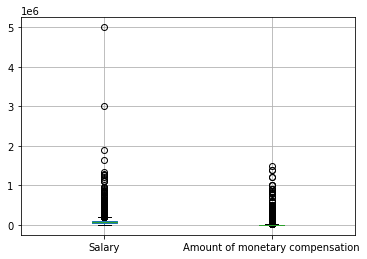

In [ ]:
df.boxplot()

<Axes: >

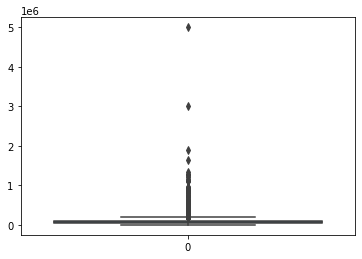

In [ ]:
sns.boxplot(df['Salary']) # очевидно выбросы есть

(<Axes: >, 24500)

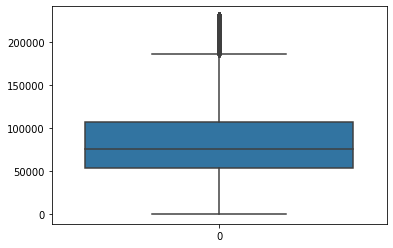

In [ ]:
z = np.abs(stats.zscore(df['Salary']))
threshold = 2

#df['Salary'][z < threshold].
df_new = df[z < threshold]
sns.boxplot(df_new['Salary']), len(df_new) #посмотрим сколько строк осталось

<Axes: >

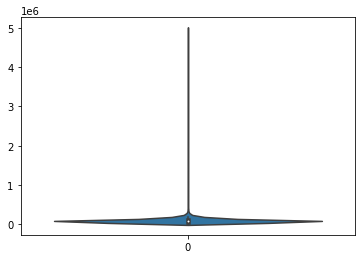

In [ ]:
# Ваш код тут
sns.violinplot(df['Salary'])

<Axes: >

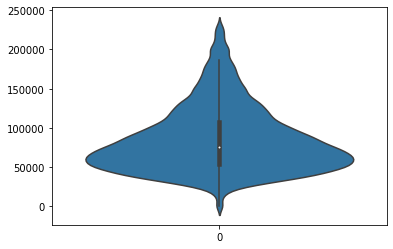

In [ ]:
sns.violinplot(df_new['Salary'])

Теперь давайте ответим на несколько вопросов о наших данных с помощью графиков

**1)** У каких десяти индустрий самые высокие средние зарплаты?

<Axes: ylabel='Industry'>

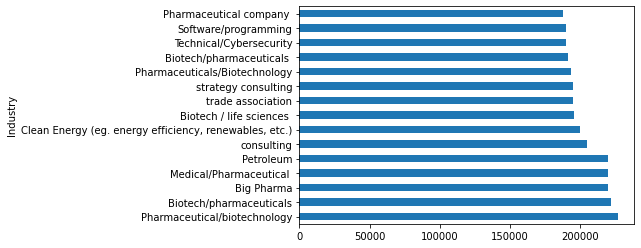

In [ ]:
# Ваш код тут
slr = df_new.groupby('Industry')['Salary'].mean()
slr = slr.sort_values(ascending=False)[:15]
slr.plot(kind='barh')

In [ ]:
print(*slr.index[:10].to_list(), sep='\n')
#индустрии с самой высокой средней зарплатой в порядке убывания (Хотя конечно надо еще препроцессить индустрии, но лень...)

Pharmaceutical/biotechnology
Biotech/pharmaceuticals
Big Pharma
Medical/Pharmaceutical 
Petroleum
consulting
Clean Energy (eg. energy efficiency, renewables, etc.)
Biotech / life sciences 
trade association
strategy consulting


**2)** Влияет ли опыт работы на среднюю зарплату?

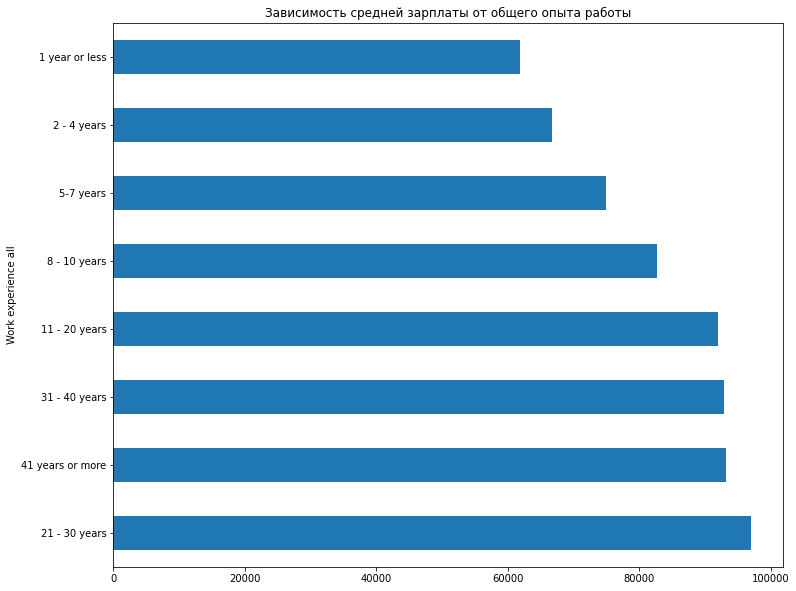

In [ ]:
# Ваш код тут
slr = df_new.groupby('Work experience all')['Salary'].mean()
slr = slr.sort_values(ascending=False)
slr.plot(kind='barh', title='Зависимость средней зарплаты от общего опыта работы', figsize=(12,10))
None

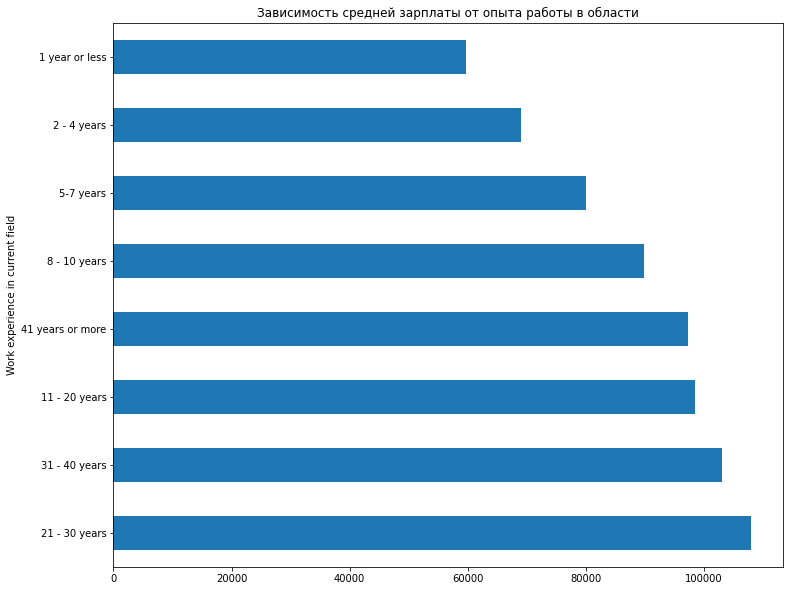

In [ ]:
slr = df_new.groupby('Work experience in current field')['Salary'].mean()
slr = slr.sort_values(ascending=False)
slr.plot(kind='barh', title='Зависимость средней зарплаты от опыта работы в области', figsize=(12,10))
None

***В целом зависимость есть, как и от опыта работы в принципе, так и от опыта работы в конкретной области. Чем выше опыт -> тем выше з/п, однако зависимость немного нарушается, когда опыт переваливает за 30 лет, видимо сказывается возраст человека на его способностях***

**3)** Выделяется ли в зарплате и премиях зависимость от образования? (Тут нужно построить scatter plot, при этом выбрать значения Amount of monetary compensation неравные 0)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


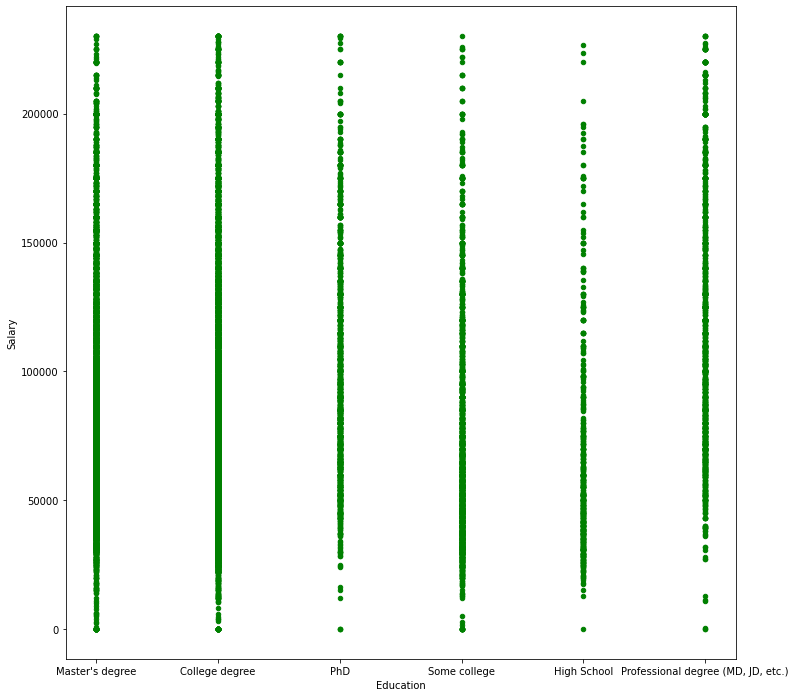

In [ ]:
# Ваш код тут
df_new.plot.scatter('Education', 'Salary', color='g', figsize=(12, 12))
None

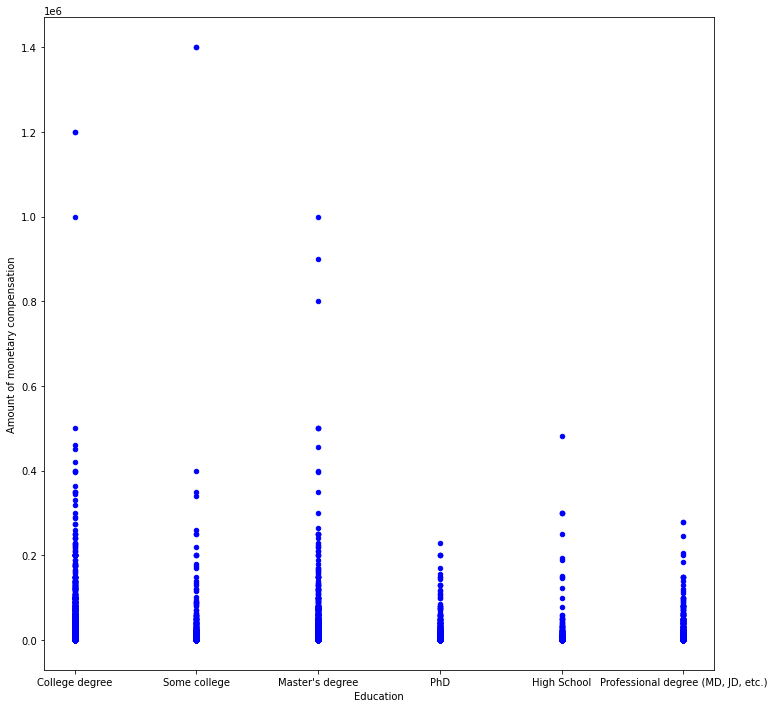

In [ ]:
df_new.loc[df_new['Amount of monetary compensation'] != 0].plot.scatter('Education', 'Amount of monetary compensation', color='b', figsize=(12, 12))
None

**Как видим, образование не коррелирует с высокой зарплатой, однако низкие зарплаты чаще встречаются у людей с образованием Master's degree и Colleg degree**


**Премии также не особо выделяются зависимостью с уроавнем образования (не считая единичных точек, которые возможно могут быть выбросами)**





# **Задание 4. Создание новых признаков (4 балла)**

Давайте теперь создадим **2 новых признака**. Мы предлагаем вам три идеи, но вы вправе придумать что то свое. Главное условие, признаки не должны повторять предыдущие и быть линейно зависимыми. например нельзя просто умножить колонку Salary на два и добавить ее к датафрейму.

Идеи которые предлагаем мы:

1.   Преобразовать колонку Race и сделать ее полезной для будующей модели. Это не совсем создание нового признака, скорее преобразование старого. Все расы в ней разделены союзом or или запятой. Вы можете создать аналог дамми переменных и разделить расы на колонки. если человек указал данную расу - ставить 1.
2.   Создать новую колонку с населением города, в котором живет человек. Для этого вы можете взять данные по пути - /content/REU-Ml-SCHOOL/city_population_data.csv.
3. Добавить колонку со cредней зарплатой человека, основанной на его возрасте и опыте работы.


In [ ]:
df = df_new

In [ ]:
np.unique(df['Race'])

array(['Another option not listed here or prefer not to answer',
       'Asian or Asian American',
       'Asian or Asian American, Another option not listed here or prefer not to answer',
       'Asian or Asian American, Black or African American',
       'Asian or Asian American, Black or African American, Hispanic, Latino, or Spanish origin',
       'Asian or Asian American, Black or African American, Native American or Alaska Native, White',
       'Asian or Asian American, Black or African American, White',
       'Asian or Asian American, Hispanic, Latino, or Spanish origin',
       'Asian or Asian American, Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer',
       'Asian or Asian American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White',
       'Asian or Asian American, Hispanic, Latino, or Spanish origin, White',
       'Asian or Asian American, Hispanic, Latino, or Spanish origin, White, Another option no

In [ ]:
# Ваш код тут
df['White'] = np.where(df['Race'].apply(lambda x: 'white' in x.lower()), 1, 0)
df['Asian'] = np.where(df['Race'].apply(lambda x: 'asian' in x.lower()), 1, 0)
df['Black'] = np.where(df['Race'].apply(lambda x: 'black' in x.lower()), 1, 0)
df['American'] = np.where(df['Race'].apply(lambda x: 'american' in x.lower()), 1, 0)
df['Spanish'] = np.where(df['Race'].apply(lambda x: 'spanish' in x.lower()), 1, 0)
df.sample(10)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,...,Work experience all,Work experience in current field,Education,Gender,Race,White,Asian,Black,American,Spanish
4528,4/27/2021 12:52:31,25-34,Government and Public Administration,Government analyst/PA I,"Coded as a military contractor, level PA I (Pe...",43500.0,200.0,Only bonuses are provided as $50 gift cards fo...,USA,Kentucky,...,2 - 4 years,2 - 4 years,College degree,Woman,White,1,0,0,0,0
17851,4/29/2021 12:34:39,25-34,Transport or Logistics,Director,No information,175000.0,30000.0,No information,USA,New York,...,8 - 10 years,8 - 10 years,Master's degree,Man,White,1,0,0,0,0
24631,12/28/2021 16:52:57,35-44,Nonprofits,Senior Data and Policy Specialist,No information,89000.0,0.0,No information,USA,Massachusetts,...,11 - 20 years,8 - 10 years,PhD,Woman,White,1,0,0,0,0
61,4/27/2021 11:04:36,25-34,Computing or Tech,Technical specialist,No information,34000.0,2000.0,No information,USA,Minnesota,...,5-7 years,5-7 years,College degree,Woman,White,1,0,0,0,0
20699,5/1/2021 19:37:44,25-34,Computing or Tech,Senior UX Designer,No information,140000.0,0.0,I'm a city government employee and took a pay ...,USA,California,...,11 - 20 years,8 - 10 years,Some college,Man,White,1,0,0,0,0
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,No information,67158.0,4920.0,No information,UK,Another Country,...,8 - 10 years,5-7 years,College degree,Woman,White,1,0,0,0,0
19692,4/30/2021 17:34:13,35-44,Nonprofits,Senior Director,No information,80000.0,0.0,No information,USA,Virginia,...,11 - 20 years,11 - 20 years,College degree,Woman,White,1,0,0,0,0
20674,5/1/2021 17:44:15,18-24,Media & Digital,Software Engineer,Inside a large legacy media company,97000.0,4000.0,No information,USA,District of Columbia,...,2 - 4 years,2 - 4 years,College degree,Man,White,1,0,0,0,0
22145,5/5/2021 19:38:39,25-34,Nonprofits,Editorial Coordinator,for scientific publications w/i a university,65000.0,0.0,No information,USA,Washington,...,5-7 years,5-7 years,College degree,Woman,White,1,0,0,0,0
24539,11/5/2021 14:03:09,25-34,Computing or Tech,Data engineer,No information,140000.0,10000.0,No information,USA,Pennsylvania,...,8 - 10 years,5-7 years,Master's degree,Man,White,1,0,0,0,0


In [ ]:
ppl = pd.read_csv('/content/REU-Ml-SCHOOL/city_population_data.csv', usecols=['city', 'population'])
ppl.sample(10, random_state=42)

,city,population
420,Davis,76997.0
613,Gallatin,42918.0
1181,Nevada,8699.0
925,Leadville,5554.0
429,Decatur,87236.0
1502,San Ramon,75995.0
527,Espoo,269802.0
838,Keene,22786.0
1627,Statesboro,42102.0
651,Goodyear,86840.0


In [ ]:
df['City'], ppl['city']

(0               Boston
 1            Cambridge
 2          Chattanooga
 3            Milwaukee
 4           Greenville
              ...      
 24927    New York City
 24928           Dallas
 24929        Brunswick
 24930     Spotsylvania
 24931          Chicago
 Name: City, Length: 24500, dtype: object, 0         A Coruña
 1           Aachen
 2       Abbotsford
 3         Aberdeen
 4          Abidjan
            ...    
 1893        Zagreb
 1894          Zion
 1895           Zug
 1896        Zwolle
 1897        Zürich
 Name: city, Length: 1898, dtype: object)

In [ ]:
(ppl['city'] == 'Moscow').sum()

1

In [ ]:
ppl['city'] = ppl['city'].apply(lambda x: x.lower())
df['City'] = df['City'].apply(lambda x: x.lower())

In [ ]:
df['City'] = df['City'].apply(lambda x: x[:x.find(',')] if ',' in x else x)

In [ ]:
df['population'] = df['City'].map(ppl.set_index('city')['population'])


In [ ]:
df['City'][df['population'].isna()] #опять же много надо препроцессить(

13                 saint paul
24              washington dc
33          research triangle
51                         dc
59       district of columbia
                 ...         
24912                     nyc
24917               honolulu 
24918               columbus 
24927           new york city
24930            spotsylvania
Name: City, Length: 5383, dtype: object

In [ ]:
df['population'][df['population'].isna()] = 100000

На этом все, если вы качественно подготовили данные, то у вас на руках датасет, который можно использоват например для обучения модели по предсказанию зарплаты или для научной работы

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24500 entries, 0 to 24931
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Timestamp                         24500 non-null  object 
 1   Age                               24500 non-null  object 
 2   Industry                          24500 non-null  object 
 3   Job                               24500 non-null  object 
 4   Job context                       24500 non-null  object 
 5   Salary                            24500 non-null  float64
 6   Amount of monetary compensation   24500 non-null  float64
 7   Income context                    24500 non-null  object 
 8   Country                           24500 non-null  object 
 9   State in USA                      24500 non-null  object 
 10  City                              24500 non-null  object 
 11  Work experience all               24500 non-null  object 
 12  Work